# Overview
This script takes in an image and returns a list of coordinates of pixels which the centre of the robot should visit.

Variables which depend on the robot and setting: 
radius, colour channels

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy

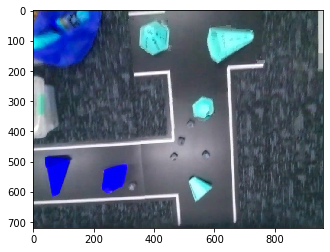

In [2]:
img = cv2.imread("0.jpg", cv2.IMREAD_UNCHANGED)
plt.imshow(img)

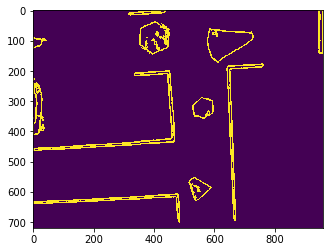

In [3]:
img_contours = np.zeros(img.shape[:2])
def drawcontour(channel):
    img_chan = img[:,:,channel]
    thresh = 200
    ret,thresh_img = cv2.threshold(img_chan, thresh, 255, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
    cv2.drawContours(img_contours, contours, -1, 1, 3)

#draw contours based on all three channels
drawcontour(0)
drawcontour(1)
drawcontour(2)
plt.imshow(img_contours)

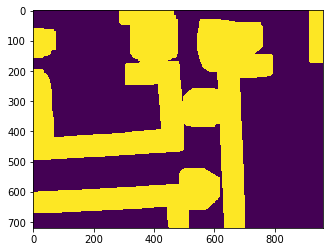

In [4]:
def expand(bitmap, radius):
    height = bitmap.shape[0]
    width = bitmap.shape[1]
    newbitmap = copy.deepcopy(bitmap)
    for x in range(height):
        for y in range(width):
            if bitmap[x,y]==0: continue
            newbitmap[max(x-radius,0):min(x+radius,width), max(y-radius,0):min(y+radius,width)] = 1
    return newbitmap
    
plt.imshow(expand(img_contours, 30))

In [5]:
#Path finding is incomplete for now